# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date_unformatted = city_weather['dt']
        city_date_struct = time.localtime(city_date_unformatted) # Raw format from the api call
        city_date = time.strftime('%Y-%m-%d', city_date_struct) # Formatted so it can be readable to humans

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vorgashor
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | tongouson
Processing Record 4 of Set 1 | edinburgh of the seven seas
Processing Record 5 of Set 1 | nishinoomote
Processing Record 6 of Set 1 | badger
Processing Record 7 of Set 1 | avarua
Processing Record 8 of Set 1 | kone
Processing Record 9 of Set 1 | turinsk
Processing Record 10 of Set 1 | buckeye
Processing Record 11 of Set 1 | thompson
Processing Record 12 of Set 1 | bilibino
Processing Record 13 of Set 1 | puerto natales
Processing Record 14 of Set 1 | chernyshevskiy
Processing Record 15 of Set 1 | lazaro cardenas
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | blackmans bay
Processing Record 18 of Set 1 | viedma
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | cooma
Processing Record 21 of Set 1 | sangsong-ni
Processing Record 22 of Set 1 | timbuktu
Processi

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vorgashor,67.5833,63.9500,-6.21,95,98,3.25,RU,2025-04-10
1,adamstown,-25.0660,-130.1015,23.73,78,20,5.33,PN,2025-04-10
2,tongouson,5.0214,120.1328,29.69,65,86,0.45,PH,2025-04-10
3,edinburgh of the seven seas,-37.0676,-12.3116,14.14,76,100,13.49,SH,2025-04-10
4,nishinoomote,30.7333,131.0000,19.31,68,20,12.35,JP,2025-04-10


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vorgashor,67.5833,63.9500,-6.21,95,98,3.25,RU,2025-04-10
1,adamstown,-25.0660,-130.1015,23.73,78,20,5.33,PN,2025-04-10
2,tongouson,5.0214,120.1328,29.69,65,86,0.45,PH,2025-04-10
3,edinburgh of the seven seas,-37.0676,-12.3116,14.14,76,100,13.49,SH,2025-04-10
4,nishinoomote,30.7333,131.0000,19.31,68,20,12.35,JP,2025-04-10


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

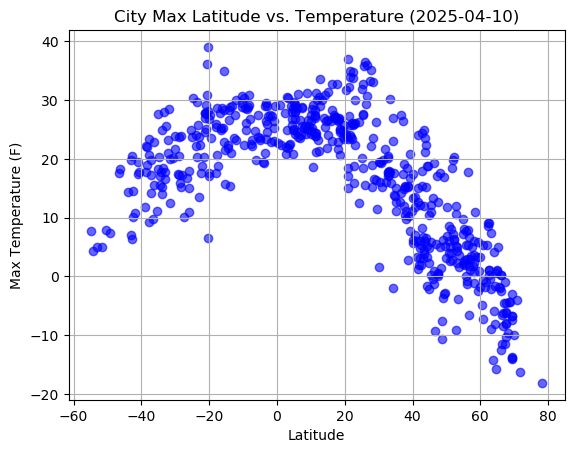

In [17]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']

from datetime import date
today = date.today()

plt.scatter(x_values,y_values, 
            label="Cities", 
            color="blue", 
            alpha=0.6,
            marker="o"
           )
plt.title(f"City Max Latitude vs. Temperature ({today})") 
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

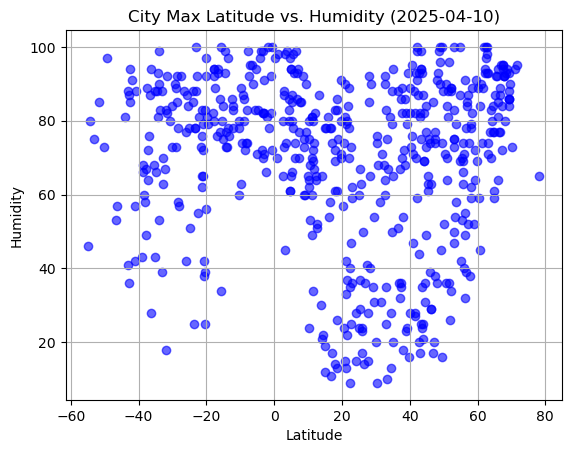

In [18]:
# Build scatter plot for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']

from datetime import date
today = date.today()

plt.scatter(x_values,y_values, 
            label="Cities", 
            color="blue", 
            alpha=0.6,
            marker="o"
           )
plt.title(f"City Max Latitude vs. Humidity ({today})") 
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

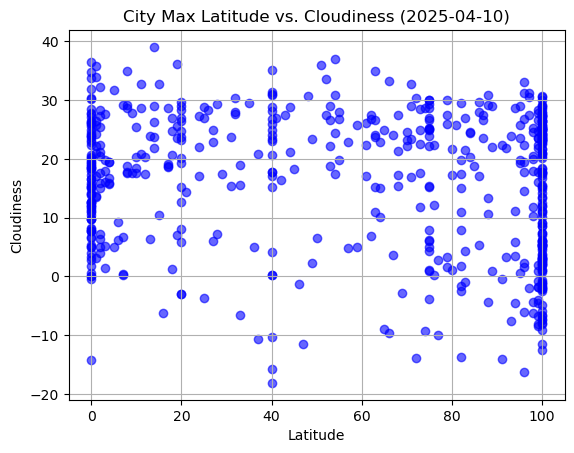

In [19]:
# Build scatter plot for latitude vs. cloudiness
x_values = city_data_df['Cloudiness']
y_values = city_data_df['Max Temp']

from datetime import date
today = date.today()

plt.scatter(x_values,y_values, 
            label="Cities", 
            color="blue", 
            alpha=0.6,
            marker="o"
           )
plt.title(f"City Max Latitude vs. Cloudiness ({today})") 
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

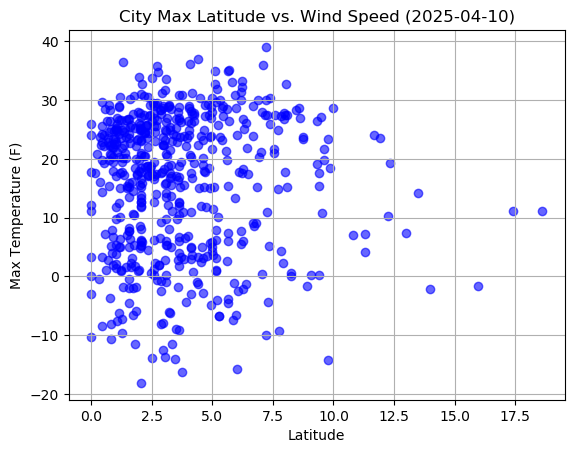

In [20]:
# Build scatter plot for latitude vs. wind speed plot
x_values = city_data_df['Wind Speed']
y_values = city_data_df['Max Temp']

from datetime import date
today = date.today()

plt.scatter(x_values,y_values, 
            label="Cities", 
            color="blue", 
            alpha=0.6,
            marker="o"
           )
plt.title(f"City Max Latitude vs. Wind Speed ({today})") 
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship

In [53]:
"""def create_linear_regression(x, y, x_label, y_label):
    if len(x) != len(y):
        print("Error: x and y must have the same number of values.")
        return

    # Convert to NumPy arrays for consistency
    x = np.array(x, dtype=np.float64)
    y = np.array(y, dtype=np.float64)

    # Normalize if x values are too large
    x_min, x_max = x.min(), x.max()
    if x_max > 10_000:  # Scaling only if values are abnormally large
        x_scaled = (x - x_min) / (x_max - x_min)  # Min-max normalization
        print("Warning: X values were scaled for better plotting.")
    else:
        x_scaled = x

    # Perform linear regression
    slope, intercept, r, p, std_err = stats.linregress(x_scaled, y)

    # Sort values for smooth plotting
    sort_idx = np.argsort(x_scaled)
    x_sorted = x_scaled[sort_idx]
    y_sorted = y[sort_idx]

    # Generate regression line values
    regression_line = slope * x_sorted + intercept

    # Print results
    print(f"r-value: {r:.4f}")
    print(f"p-value: {p:.4f}")
    print(f"std-error: {std_err:.4f}")
    print(f"Equation: y = {slope:.2f}x + {intercept:.2f}")

    # Create the plot
    plt.figure(figsize=(8, 5))  # Set figure size first to prevent scaling issues

    # Plot data points
    plt.scatter(x_sorted, y_sorted, label="Data Points", color="blue", alpha=0.6)

    # Plot regression line
    plt.plot(x_sorted, regression_line, label="Regression Line", color="red")

    # Add labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title("Linear Regression")
    plt.legend()
    plt.grid(True)

    # Annotate equation near the top left
    plt.text(x_sorted.min(), y_sorted.max(), f"y = {slope:.2f}x + {intercept:.2f}", 
             fontsize=12, color="red", bbox=dict(facecolor='white', alpha=0.5))

    # Show the plot
    plt.show()


In [22]:
# Define a function to create Linear Regression plots
def create_linear_regression(x, y, x_titles, y_titles):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
  

    print("r-value  : ", r_value, "\np-value  : ", p_value, "\nstd-error: ", std_err)

    regress_values = x * slope + intercept
    #print(regress_values)
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(line_eq)

# Create Plot
    plt.scatter(x,y, edgecolors='black')
    plt.title(f"{x_titles} vs. {y_titles} ({today})") 
    plt.plot(x,regress_values,"r-")

# Label plot and annotate the line equation
    plt.xlabel(x_titles)
    plt.ylabel(y_titles)
    plt.grid(linestyle='--', alpha=0.7) 
    plt.gca().set_axisbelow(True)
    plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Show plot
    plt.show()

In [23]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vorgashor,67.5833,63.9500,-6.21,95,98,3.25,RU,2025-04-10
2,tongouson,5.0214,120.1328,29.69,65,86,0.45,PH,2025-04-10
4,nishinoomote,30.7333,131.0000,19.31,68,20,12.35,JP,2025-04-10
5,badger,64.8000,-147.5333,1.14,59,75,5.14,US,2025-04-10
8,turinsk,58.0458,63.6960,2.24,78,100,1.65,RU,2025-04-10


In [24]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,adamstown,-25.0660,-130.1015,23.73,78,20,5.33,PN,2025-04-10
3,edinburgh of the seven seas,-37.0676,-12.3116,14.14,76,100,13.49,SH,2025-04-10
6,avarua,-21.2078,-159.7750,27.03,83,75,3.60,CK,2025-04-10
7,kone,-21.0595,164.8658,27.70,79,32,1.73,NC,2025-04-10
12,puerto natales,-51.7236,-72.4875,5.06,85,36,1.20,CL,2025-04-10


###  Temperature vs. Latitude Linear Regression Plot

### **Model 1 (Northern Hemisphere: Temperature vs. Latitude)**
The r-value of -0.8649 shows a strong negative correlation—as temperature increases, latitude decreases, meaning warmer regions are closer to the equator. The extremely low p-value (~2.66e-120) confirms the relationship is highly statistically significant. Based on the regression equation y = -0.55x + 33.85, latitude decreases by about 0.55 degrees for every 1°C increase in temperature.


r-value  :  -0.8649005498925179 
p-value  :  2.6583448745241873e-120 
std-error:  0.016101277261120466
y = -0.55x + 33.85


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

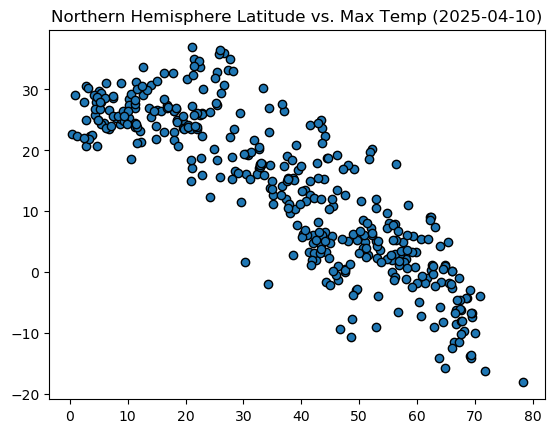

In [36]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

create_linear_regression(x_values, y_values, 'Northern Hemisphere Latitude', 'Max Temp' )

### **Model 2 (Southern Hemisphere: Temperature vs. Latitude)**
The r-value of 0.6416 indicates a moderate positive correlation, meaning as temperature increases, latitude also increases (i.e., warmer areas lie farther south). The p-value (~7.21e-21) shows the relationship is highly statistically significant. According to the regression equation y = 0.31x + 28.83, latitude increases by about 0.31 degrees for every 1°C rise in temperature.

r-value  :  0.6416299910695145 
p-value  :  7.20614916270815e-21 
std-error:  0.029012189940738547
y = 0.31x + 28.83


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

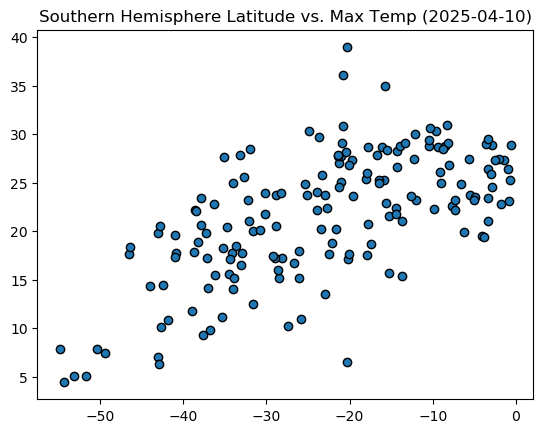

In [37]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

create_linear_regression(x_values, y_values, 'Southern Hemisphere Latitude','Max Temp')

## Humidity vs. Latitude Linear Regression Plots

### **Model 1: Northern Hemisphere: Latitude v Humidity**
The r-value of 0.1702 shows a very weak positive correlation, meaning humidity slightly increases as latitude increases, but the relationship is minimal. The p-value (~0.00066) indicates the trend is statistically significant, despite its weak strength. According to the regression equation y = 0.21x + 58.73, humidity rises by about 0.21 percentage points for every 1° increase in latitude.

r-value  :  0.17016617551201169 
p-value  :  0.0006623438274499122 
std-error:  0.06095515217965369
y = 0.21x + 58.73


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

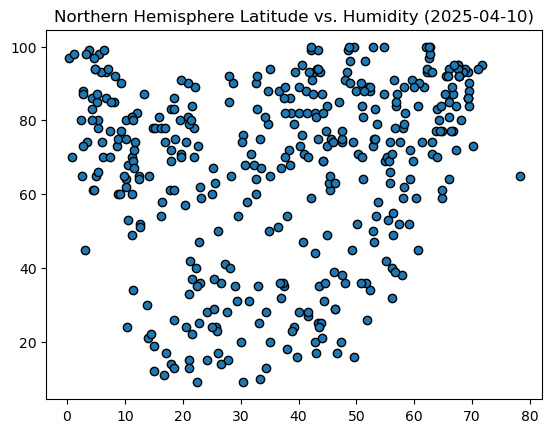

In [43]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

create_linear_regression(x_values, y_values, 'Northern Hemisphere Latitude', 'Humidity')

### **Model 2: Southern Hemisphere: Latitude v Humidity**

The r-value of 0.2740 indicates a weak positive correlation, suggesting that humidity tends to increase slightly as latitude increases. The p-value (~0.00033) confirms the relationship is statistically significant. Based on the regression equation y = 0.35x + 84.34, humidity increases by about 0.35 percentage points for each 1° increase in latitude.

r-value  :  0.274004087554138 
p-value  :  0.0003256205176062081 
std-error:  0.09619531564433058
y = 0.35x + 84.34


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

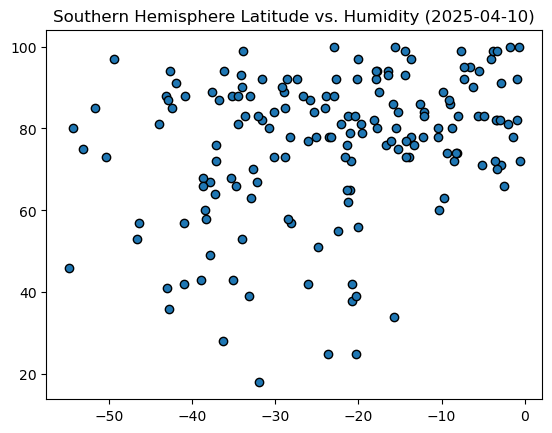

In [44]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

create_linear_regression(x_values, y_values, 'Southern Hemisphere Latitude','Humidity')

## Cloudiness vs. Latitude Linear Regression Plots

### **Model 1 (Northern Hemisphere: Cloudiness vs. Latitude)** 
The r-value of 0.1393 indicates a very weak positive correlation, suggesting that cloudiness slightly increases with latitude, though the relationship is minimal. The p-value (~0.0054) shows the trend is statistically significant, despite being weak. According to the regression equation y = 0.28x + 47.08, cloudiness increases by about 0.28 percentage points for every 1° increase in latitude.

r-value  :  0.1393435629833895 
p-value  :  0.00541538641204079 
std-error:  0.10118539808314264
y = 0.28x + 47.08


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

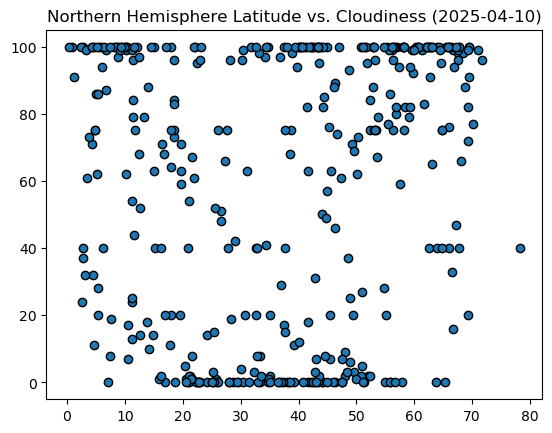

In [45]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

create_linear_regression(x_values, y_values, 'Northern Hemisphere Latitude', 'Cloudiness')

### **Model 2 (Southern Hemisphere: Cloudiness vs. Latitude)**  
The r-value of 0.2513 shows a weak positive correlation, meaning cloudiness tends to increase somewhat as latitude increases. The p-value (~0.00102) confirms the relationship is statistically significant, even though the correlation is not strong. Based on the regression equation y = 0.71x + 71.11, cloudiness increases by about 0.71 percentage points for each 1° rise in latitude.

r-value  :  0.2513221906196142 
p-value  :  0.0010158746129818456 
std-error:  0.21277373226616061
y = 0.71x + 71.11


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

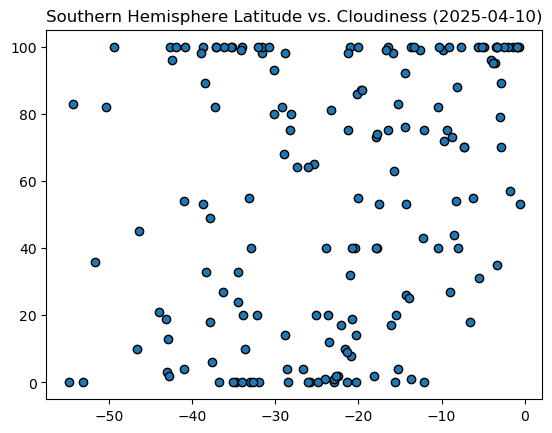

In [46]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

create_linear_regression(x_values, y_values, 'Southern Hemisphere Latitude','Cloudiness')

## Wind Speed vs. Latitude Linear Regression Plot

### **Model 1 (Northern Hemisphere)** 
The r-value of 0.0993 indicates a very weak positive correlation—as latitude increases, wind speed slightly increases, but the relationship is minimal. The p-value (~0.048) suggests the correlation is statistically significant, though just barely. The regression equation y = 0.01x + 3.31 implies that for every 1° increase in latitude, wind speed increases by only 0.01 units, reflecting a negligible effect in practice.

r-value  :  0.09929081971111935 
p-value  :  0.048041040271445165 
std-error:  0.007067407687102051
y = 0.01x + 3.31


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

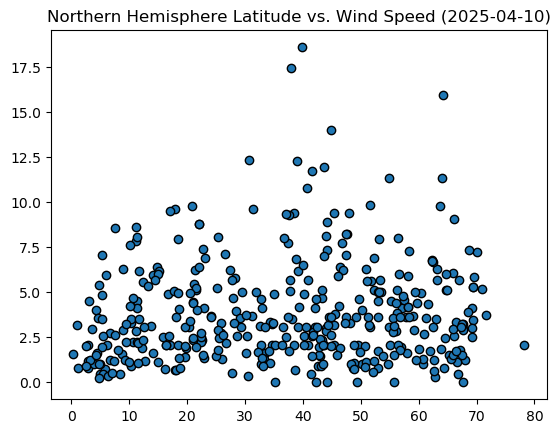

In [47]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

create_linear_regression(x_values, y_values, 'Northern Hemisphere Latitude', 'Wind Speed')

### **Model 2 (Southern Hemisphere)**  
The r-value of -0.1691 shows a weak negative correlation, meaning as latitude increases, wind speed slightly decreases. The p-value (~0.0284) indicates the relationship is statistically significant, though the effect size is small. According to the regression equation y = -0.03x + 2.52, wind speed decreases by about 0.03 units for every 1° increase in latitude.

r-value  :  -0.1690902100445155 
p-value  :  0.028444647187016253 
std-error:  0.01333153115463165
y = -0.03x + 2.52


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

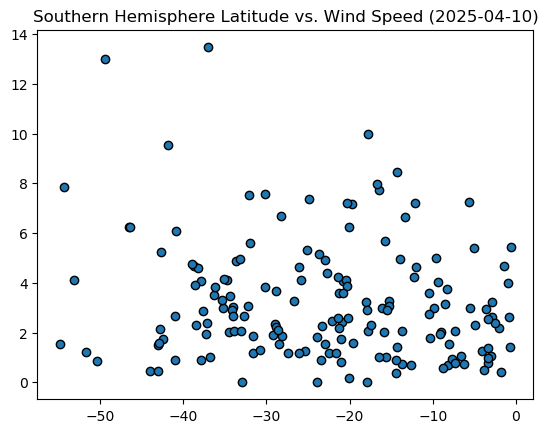

In [52]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

create_linear_regression(x_values, y_values, 'Southern Hemisphere Latitude','Wind Speed')